In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

# # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

joblib is not installed. Falling back to sequential computation.


In [3]:
loc = '/Users/thor/surfdrive/Scripts/notebooks/HNS-sequence/WorkingDir/nolinker/data/md/0_highaff/FI/drytrajs/'
traj = md.load(loc+'dry_10.xtc',top=loc+'dry_10.pdb')

In [4]:
dna = mdna.NucleicFrames(traj)
params, names = dna.get_paramters()
params.shape, names

((5001, 12, 12),
 ['shear',
  'stretch',
  'stagger',
  'buckle',
  'propeller',
  'opening',
  'shift',
  'slide',
  'rise',
  'tilt',
  'roll',
  'twist'])

Text(0.5, -0.05, 'DNA base pair')

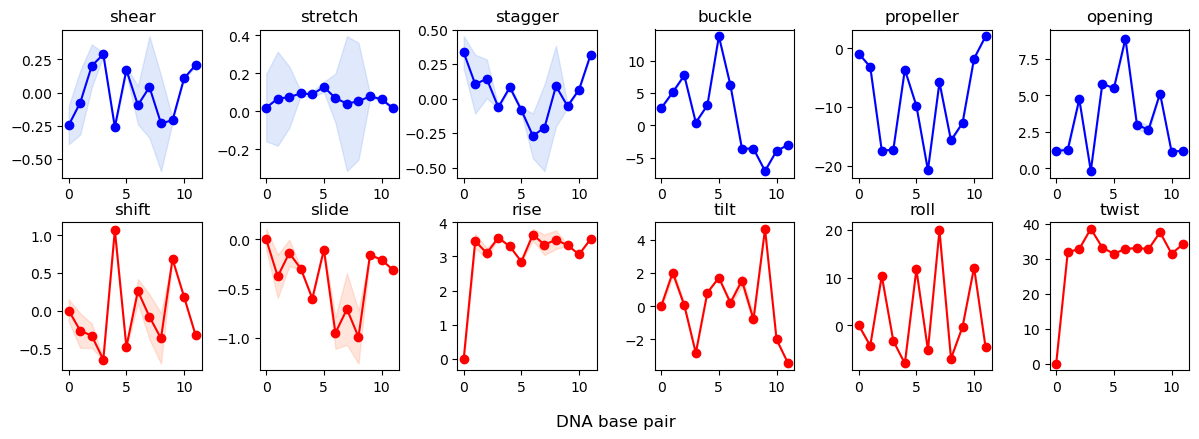

In [5]:
# Confidence intervals 
from scipy.stats import t

fig, ax = plt.subplots(2,6,figsize=(12,4))
fig.tight_layout()
ax = ax.flatten()
M = np.mean(params, axis=0)
S = np.std(params, axis=0)
n = params.shape[0]
ci = t.ppf(0.975, df=n-1) * S / np.sqrt(n)
x = np.arange(0, params.shape[1])
for _, i in enumerate(M.T):
    if _ >= 6:
        c1, c2 = 'red','coral'
    else:
        c1, c2 = 'blue','cornflowerblue'
    ax[_].plot(i[::-1], '-o',color=c1)
    ax[_].fill_between(x, (i-ci[_])[::-1], (i+ci[_])[::-1], color=c2, alpha=0.2)
    ax[_].set_title(names[_])

fig.supxlabel('DNA base pair',y=-0.05)

/Users/thor/surfdrive/Projects/pymdna/pymdna/analysis.py:168: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(groove, axis=0)
/Users/thor/opt/anaconda3/envs/mdna/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


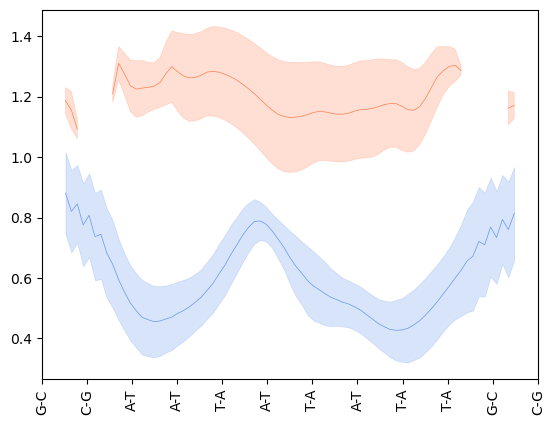

In [6]:
grooves = mdna.GrooveAnalysis(traj)
grooves.plot_groove_widths()

In [25]:
frames = dna.mean_reference_frames[::-1]
print(frames.shape)
frames = frames.swapaxes(0,2)

origins = frames[0]
origins.shape 

(12, 5001, 4, 3)


(5001, 12, 3)

In [27]:
import numpy as np

def calculate_total_length(points):
    """Calculate the total length of the curve."""
    distances = np.sqrt(np.sum(np.diff(points, axis=0)**2, axis=1))
    return np.sum(distances)

def calculate_end_to_end_distance(points):
    """Calculate the straight-line distance between the first and last point."""
    return np.linalg.norm(points[-1] - points[0])

def calculate_bounding_box(points):
    """Calculate the dimensions of the axis-aligned bounding box."""
    min_vals = np.min(points, axis=0)
    max_vals = np.max(points, axis=0)
    return max_vals - min_vals

def calculate_total_bending_angle(points):
    """Calculate the total bending angle of the curve."""
    vectors = np.diff(points, axis=0)
    cos_angles = np.einsum('ij,ij->i', vectors[:-1], vectors[1:]) / (
        np.linalg.norm(vectors[:-1], axis=1) * np.linalg.norm(vectors[1:], axis=1))
    angles = np.arccos(np.clip(cos_angles, -1.0, 1.0))
    return np.sum(angles)

# Example points array of shape (12, 3)
points = origins[0]

total_length = [calculate_total_length(point) for point in origins]
end_to_end_distance = [calculate_end_to_end_distance(point) for point in origins]
bounding_box_dimensions = [calculate_bounding_box(point) for point in origins]
total_bending_angle = [calculate_total_bending_angle(point) for point in origins]

# print(f"Total Length: {total_length}")
# print(f"End-to-End Distance: {end_to_end_distance}")
# print(f"Bounding Box Dimensions: {bounding_box_dimensions}")
# print(f"Total Bending Angle: {np.degrees(total_bending_angle)} degrees")


/Users/thor/opt/anaconda3/envs/mdna/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thor/opt/anaconda3/envs/mdna/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thor/opt/anaconda3/envs/mdna/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

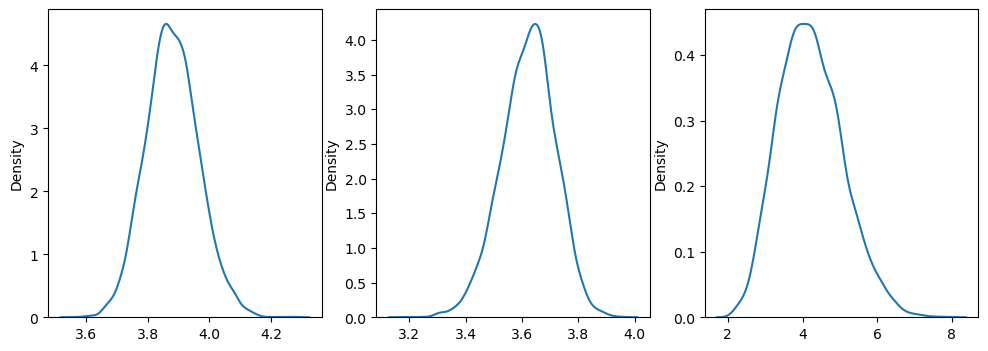

In [45]:
import seaborn as sns

fig, ax = plt.subplots(1,3,figsize=(12,4))
sns.kdeplot(total_length, label='Total Length',ax=ax[0])
sns.kdeplot(end_to_end_distance, label='End-to-End Distance',ax=ax[1])
sns.kdeplot(total_bending_angle, label='Total Bending Angle',ax=ax[2])

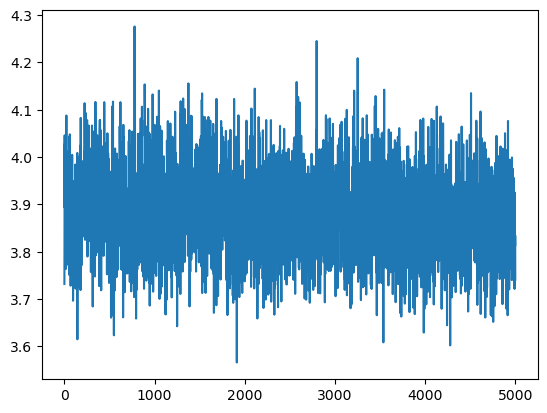

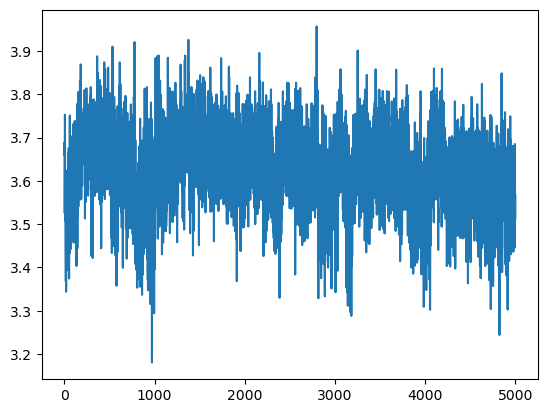

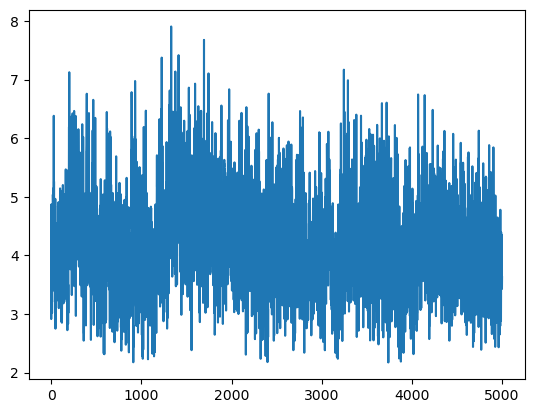

In [31]:
fig,ax=plt.subplots()
ax.plot(total_length, label='Total Length')

fig,ax=plt.subplots()
ax.plot(end_to_end_distance, label='End-to-End Distance')

fig,ax=plt.subplots()   
ax.plot(total_bending_angle, label='Total Bending Angle')

# fig,ax=plt.subplots()
# ax.plot(bounding_box_dimensions, label='Bounding Box Dimensions')

11 11 11 11
(5001, 11) (5001, 11)
11 11 11 11
(5001, 11) (5001, 11)


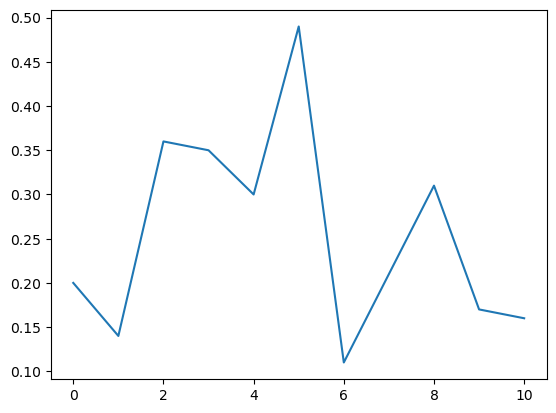

In [17]:
torsions = mdna.TorsionAnalysis(traj)
epsi, zeta = torsions.compute_BI_BII()
B_state = torsions.B_state 
epsi.shape, zeta.shape, B_state.shape
plt.plot(B_state)